<a href="https://colab.research.google.com/github/N12AM/Big-Five-Personality-Test/blob/main/Big_Five_Personality_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [403]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [375]:
data_raw = pd.read_csv('/content/drive/MyDrive/Project/data-final.csv', sep='\t')
data = data_raw.copy()
time_data = data.copy();
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

time_data.drop(time_data.columns[0:50], axis=1, inplace=True)
time_data.drop(time_data.columns[50:], axis=1, inplace=True)


EXT1     2.648067
EXT2     2.773115
EXT3     3.288349
EXT4     3.140595
EXT5     3.276960
EXT6     2.401100
EXT7     2.771744
EXT8     3.414818
EXT9     2.963740
EXT10    3.556469
EST1     3.285969
EST2     3.165072
EST3     3.846466
EST4     2.663756
EST5     2.843086
EST6     2.841154
EST7     3.050394
EST8     2.683485
EST9     3.088511
EST10    2.773504
AGR1     2.255316
AGR2     3.831103
AGR3     2.259957
AGR4     3.927497
AGR5     2.270857
AGR6     3.743075
AGR7     2.195806
AGR8     3.689389
AGR9     3.789116
AGR10    3.592351
CSN1     3.297999
CSN2     2.930295
CSN3     3.975280
CSN4     2.617866
CSN5     2.625832
CSN6     2.831821
CSN7     3.698187
CSN8     2.465306
CSN9     3.200695
CSN10    3.590596
OPN1     3.654636
OPN2     2.075933
OPN3     4.000068
OPN4     1.999891
OPN5     3.792905
OPN6     1.894605
OPN7     3.976375
OPN8     3.182453
OPN9     4.122993
OPN10    3.958441
dtype: float64

In [376]:
print('Number of participants: ', len(data))
data.head()
data.describe()
print(data.dtypes)

print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
time_data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))


Number of participants:  1015341
EXT1       float64
EXT2       float64
EXT3       float64
EXT4       float64
EXT5       float64
EXT6       float64
EXT7       float64
EXT8       float64
EXT9       float64
EXT10      float64
EST1       float64
EST2       float64
EST3       float64
EST4       float64
EST5       float64
EST6       float64
EST7       float64
EST8       float64
EST9       float64
EST10      float64
AGR1       float64
AGR2       float64
AGR3       float64
AGR4       float64
AGR5       float64
AGR6       float64
AGR7       float64
AGR8       float64
AGR9       float64
AGR10      float64
CSN1       float64
CSN2       float64
CSN3       float64
CSN4       float64
CSN5       float64
CSN6       float64
CSN7       float64
CSN8       float64
CSN9       float64
CSN10      float64
OPN1       float64
OPN2       float64
OPN3       float64
OPN4       float64
OPN5       float64
OPN6       float64
OPN7       float64
OPN8       float64
OPN9       float64
OPN10      float64
country     objec

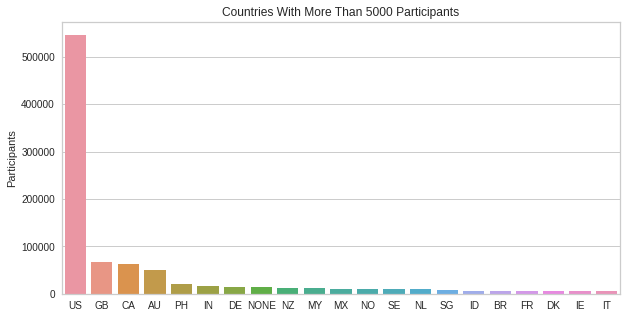

In [377]:
# Participants' nationality distribution
countries = pd.DataFrame(data['country'].value_counts())
# print(countries) --------------------------------------------------------------------------
# print(countries[countries['country']])----------------------------------------------------

countries_5000 = countries[countries['country'] >= 5000]
# print(countries_5000) ---------------------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');
plt.show()
plt.close()

In [378]:
print(time_data)

         EXT1_E  EXT2_E  EXT3_E  EXT4_E  EXT5_E  EXT6_E  EXT7_E  EXT8_E  \
0        9419.0  5491.0  3959.0  4821.0  5611.0  2756.0  2388.0  2113.0   
1        7235.0  3598.0  3315.0  2564.0  2976.0  3050.0  4787.0  3228.0   
2        4657.0  3549.0  2543.0  3335.0  5847.0  2540.0  4922.0  3142.0   
3        3996.0  2896.0  5096.0  4240.0  5168.0  5456.0  4360.0  4496.0   
4        6004.0  3965.0  2721.0  3706.0  2968.0  2426.0  7339.0  3302.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
1015336  5694.0  3927.0  4600.0  5255.0  1688.0  2216.0  5064.0  3288.0   
1015337  2382.0  1984.0  3696.0  1736.0  2272.0  2327.0  2088.0  2296.0   
1015338  4077.0  2120.0  1688.0  2528.0  1721.0  2711.0  5329.0  2080.0   
1015339  8647.0  2664.0  3544.0  2263.0  2248.0  3024.0  4704.0  3383.0   
1015340  4425.0  2472.0  3163.0  2571.0   984.0  2853.0  2987.0  4771.0   

          EXT9_E  EXT10_E  EST1_E  EST2_E  EST3_E  EST4_E  EST5_E  EST6_E  \
0         5900.0   411

In [379]:
# # Groups and Questions
ext_questions = {'EXT1': 'I am the life of the party',
                 'EXT2': 'I don\'t talk a lot',
                 'EXT3': 'I feel comfortable around people',
                 'EXT4': 'I keep in the background',
                 'EXT5': 'I start conversations',
                 'EXT6': 'I have little to say',
                 'EXT7': 'I talk to a lot of different people at parties',
                 'EXT8': 'I don\'t like to draw attention to myself',
                 'EXT9': 'I don\'t mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}
#
est_questions = {'EST1': 'I get stressed out easily',
                 'EST2': 'I am relaxed most of the time',
                 'EST3': 'I worry about things',
                 'EST4': 'I seldom feel blue',
                 'EST5': 'I am easily disturbed',
                 'EST6': 'I get upset easily',
                 'EST7': 'I change my mood a lot',
                 'EST8': 'I have frequent mood swings',
                 'EST9': 'I get irritated easily',
                 'EST10': 'I often feel blue'}
#
agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}
#



In [380]:

ext_e_questions = {'EXT1_E': 'I am the life of the party',
                   'EXT2_E': 'I don\'t talk a lot',
                   'EXT3_E': 'I feel comfortable around people',
                   'EXT4_E': 'I keep in the background',
                   'EXT5_E': 'I start conversations',
                   'EXT6_E': 'I have little to say',
                   'EXT7_E': 'I talk to a lot of different people at parties',
                   'EXT8_E': 'I don\'t like to draw attention to myself',
                   'EXT9_E': 'I don\'t mind being the center of attention',
                   'EXT10_E': 'I am quiet around strangers'}

est_e_questions = {'EST1_E': 'I get stressed out easily',
                   'EST2_E': 'I am relaxed most of the time',
                   'EST3_E': 'I worry about things',
                   'EST4_E': 'I seldom feel blue',
                   'EST5_E': 'I am easily disturbed',
                   'EST6_E': 'I get upset easily',
                   'EST7_E': 'I change my mood a lot',
                   'EST8_E': 'I have frequent mood swings',
                   'EST9_E': 'I get irritated easily',
                   'EST10_E': 'I often feel blue'}

agr_e_questions = {'AGR1_E' : 'I feel little concern for others',
                 'AGR2_E' : 'I am interested in people',
                 'AGR3_E' : 'I insult people',
                 'AGR4_E' : 'I sympathize with others feelings',
                 'AGR5_E' : 'I am not interested in other peoples problems',
                 'AGR6_E' : 'I have a soft heart',
                 'AGR7_E' : 'I am not really interested in others',
                 'AGR8_E' : 'I take time out for others',
                 'AGR9_E' : 'I feel others emotions',
                 'AGR10_E': 'I make people feel at ease'}

csn_e_questions = {'CSN1_E' : 'I am always prepared',
                 'CSN2_E' : 'I leave my belongings around',
                 'CSN3_E' : 'I pay attention to details',
                 'CSN4_E' : 'I make a mess of things',
                 'CSN5_E' : 'I get chores done right away',
                 'CSN6_E' : 'I often forget to put things back in their proper place',
                 'CSN7_E' : 'I like order',
                 'CSN8_E' : 'I shirk my duties',
                 'CSN9_E' : 'I follow a schedule',
                 'CSN10_E' : 'I am exacting in my work'}

opn_e_questions = {'OPN1_E' : 'I have a rich vocabulary',
                 'OPN2_E' : 'I have difficulty understanding abstract ideas',
                 'OPN3_E' : 'I have a vivid imagination',
                 'OPN4_E' : 'I am not interested in abstract ideas',
                 'OPN5_E' : 'I have excellent ideas',
                 'OPN6_E' : 'I do not have a good imagination',
                 'OPN7_E' : 'I am quick to understand things',
                 'OPN8_E' : 'I use difficult words',
                 'OPN9_E' : 'I spend time reflecting on things',
                 'OPN10_E': 'I am full of ideas'}

In [381]:
# # Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

#group names and columns for time
EXT_E = [column for column in time_data if column.startswith('EXT') and column.endswith('E')]
EST_E = [column for column in time_data if column.startswith('EST') and column.endswith('E')]
AGR_E = [column for column in time_data if column.startswith('AGR') and column.endswith('E')]
CSN_E = [column for column in time_data if column.startswith('CSN') and column.endswith('E')]
OPN_E = [column for column in time_data if column.startswith('OPN') and column.endswith('E')]
#

In [382]:
# # Defining a function to visualize the questions and answers distribution
def vis_questions(groupName, questions, color):
    plt.figure(figsize=(40, 10))
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        d = data[groupName[i - 1]]
        plt.hist(d, bins=11, color=color, alpha=.5)
        plt.title(questions[groupName[i - 1]], fontsize=10)
        # print(d)
        # print(d[1)
    plt.show()
    plt.close()

Q&As Related to Extroversion Personality


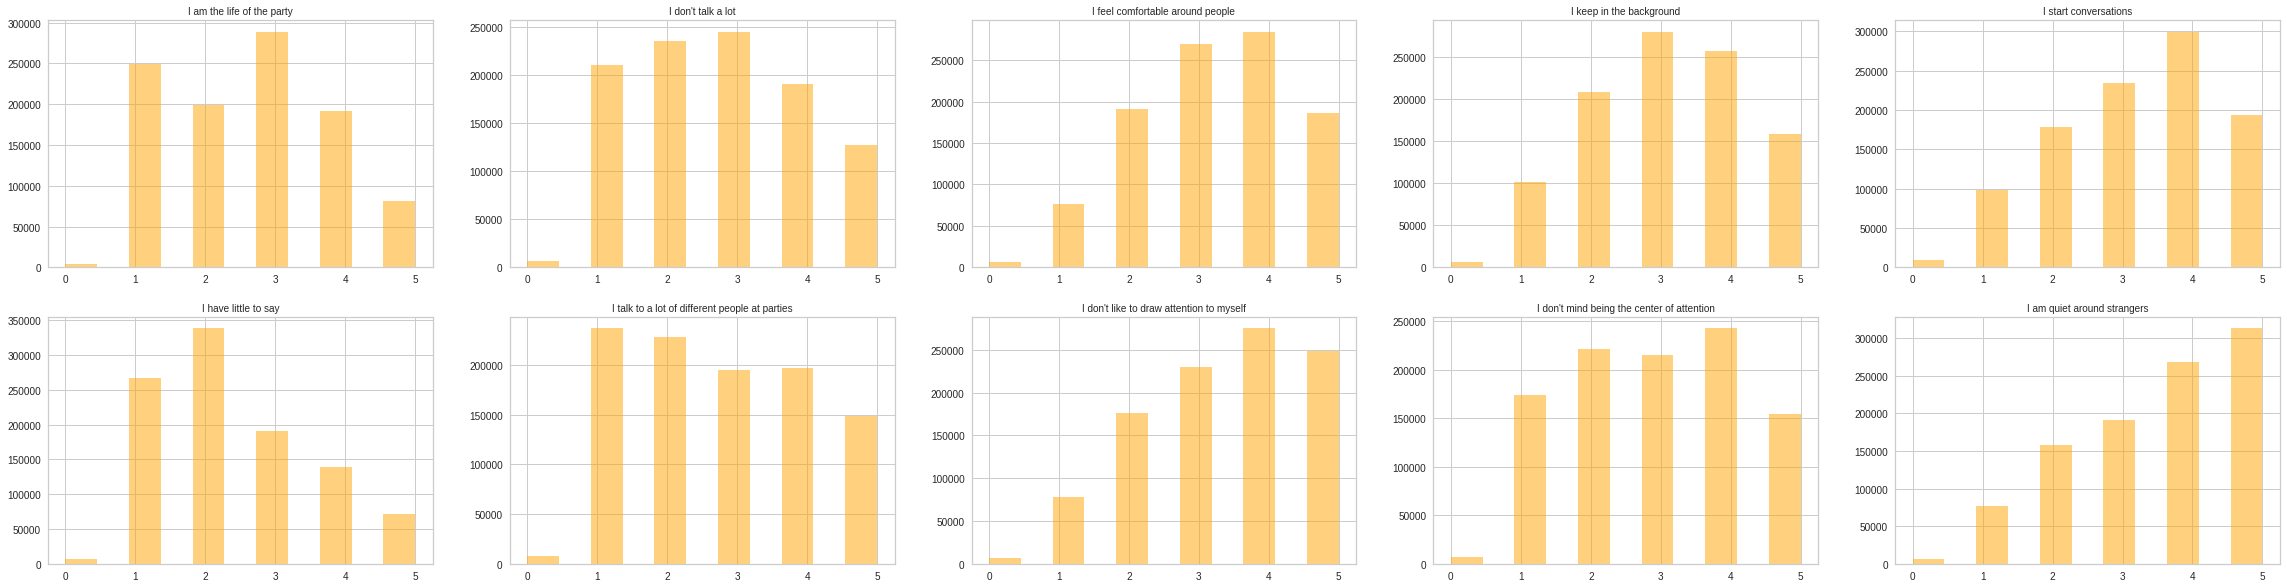

In [383]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')


Q&As Related to Neuroticism Personality


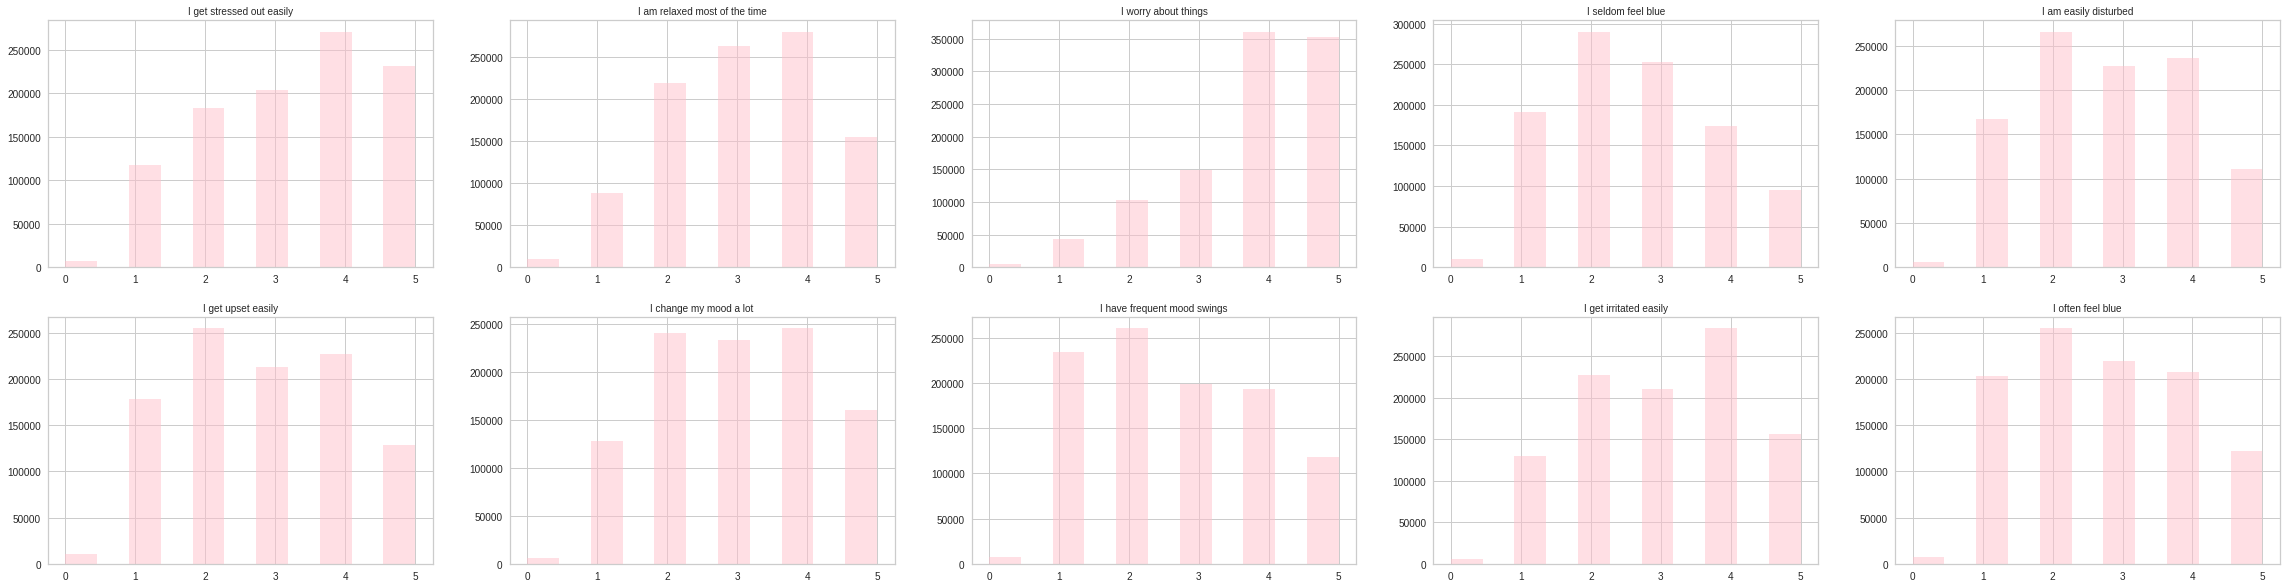

In [384]:

print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')




Q&As Related to Agreeable Personality


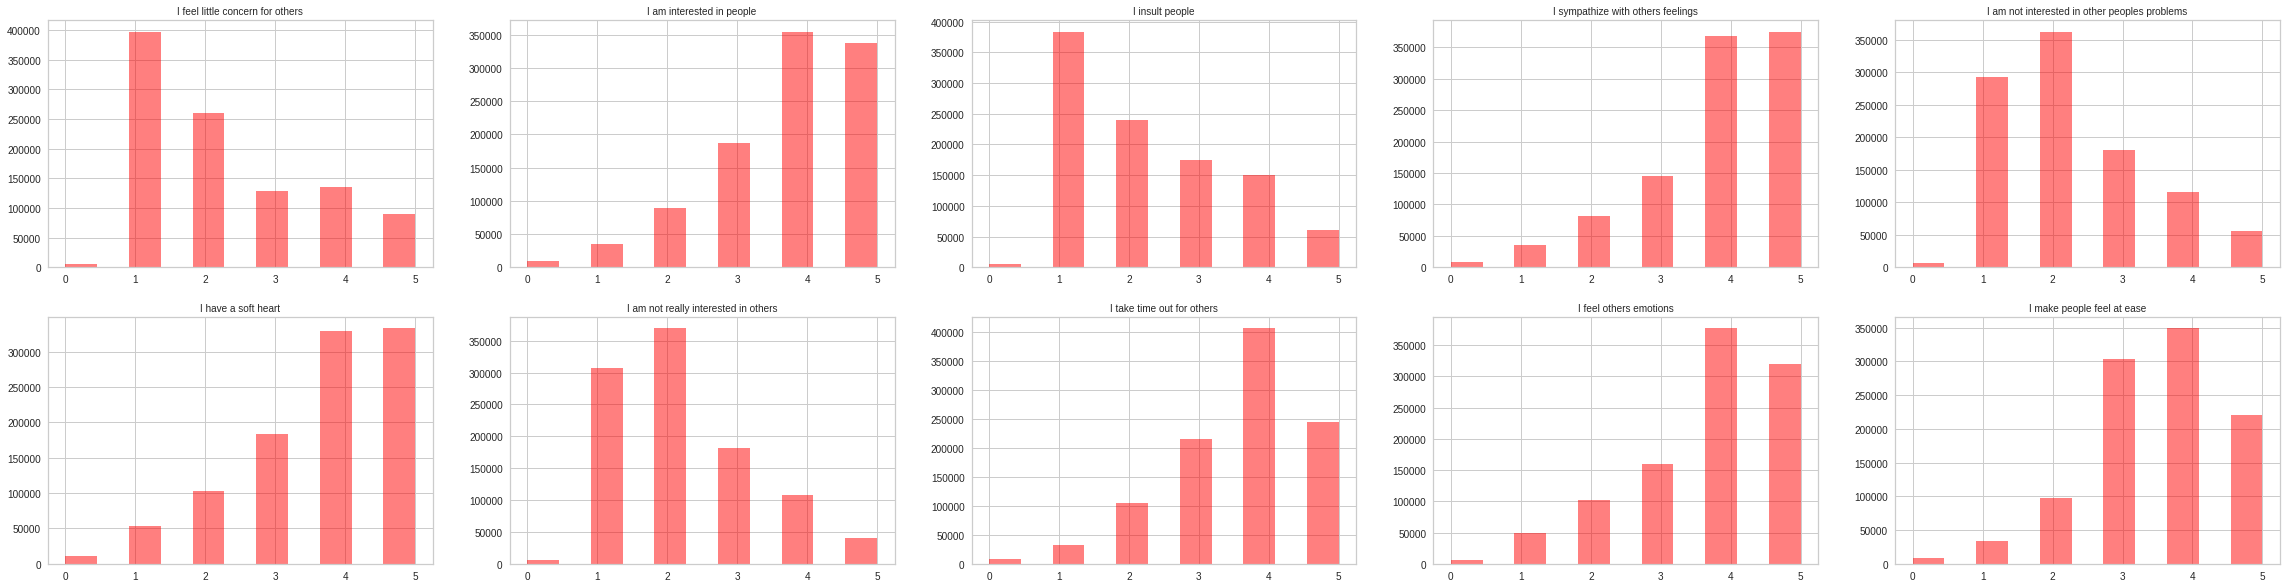

In [385]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')



Q&As Related to Conscientious Personality


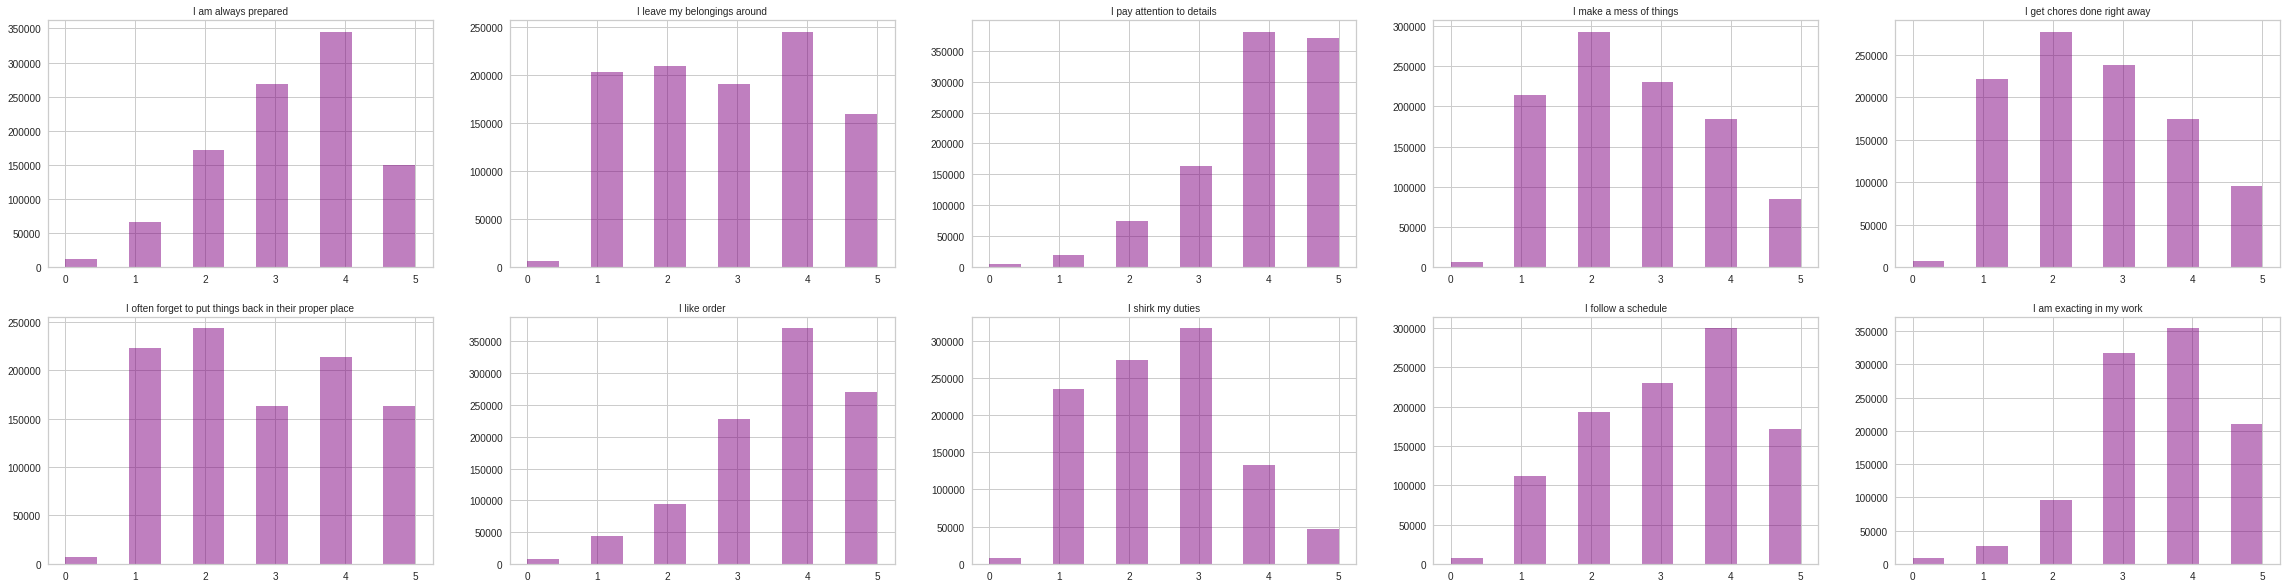

In [386]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')



Q&As Related to Open Personality


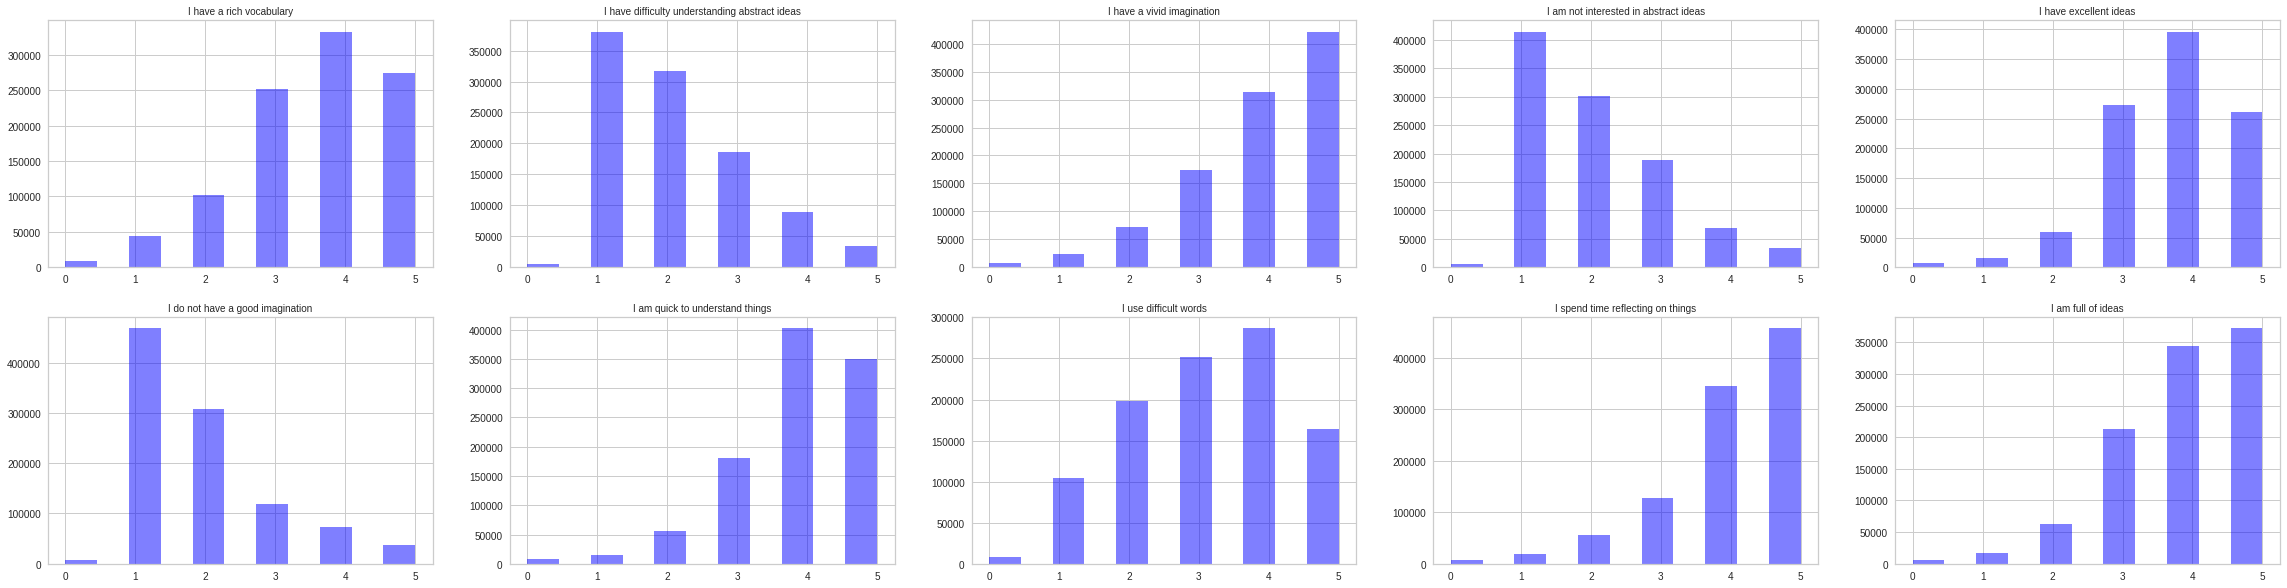

In [387]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

In [388]:
def time_required_for_questions(groupName, str, questions, color):
    
    #get the proper lael for each column
    column_label = [column for column in time_data if column.startswith(str)]
    
    #create a variable consisting only the columns for a given personality question
    #in this case 10 columns = 10 questions
    time_column_data = time_data[[column_label[0], column_label[1],
                                 column_label[2], column_label[3],
                                 column_label[4], column_label[5],
                                 column_label[6], column_label[7],
                                 column_label[8], column_label[9]]]

    # make a slice of the columns having only 100 rows
    # having more rows will make the graph incomprehensible as there will be lots of points in a small place 
    time_axis = time_column_data[:100]
    
    # to show total time, we make transpose of the dataset and add the rows  
    # time_axis_transpose = time_axis.T
    time_axis_transpose = time_column_data.T

    # now add each row
    time_required_for_each_question = time_axis_transpose.sum(axis=1)
    # print("time reqired for each question:")
    # print(time_required_for_each_question)

    # for 100 individual 
    time_avg = time_required_for_each_question/len(time_column_data)
    # print("\nAverage time:")
    # print(time_avg)
    # draw the graph
    plt.figure(figsize=(25, 11))

    # for 10 question ['EXT1_E', 'EXT2_E', 'EXT3_E', ...]-----------------------
    for i in range(1, 11):
      # subplot consisting 2 rows and 5 columns = (2*5) = 10
      plt.subplot(2, 5, i)
      
      # time_axis.index is the index number of the rows
      plt.plot(time_axis[groupName[i-1]], time_axis.index, marker='o', color= color)
      plt.title(groupName[i-1])
      plt.ylabel('index number')
      plt.xlabel('time required')
    
    plt.show()
    plt.close()

    
    # show the 2nd graph -------------------------------------------------------
    plt.figure(figsize=(25, 5))
    rows = list(range(0,10))
    # plt.plot(time_required_for_each_question.index, time_required_for_each_question/100, color=color, marker='o')
    plt.plot(time_required_for_each_question.index, time_required_for_each_question/len(time_column_data), color=color, marker='o')
    plt.title('Average time required for each question')
    plt.ylabel('average time')
    plt.xlabel('questions')
    plt.show()
    plt.close()

Time required for Extroversion Personality


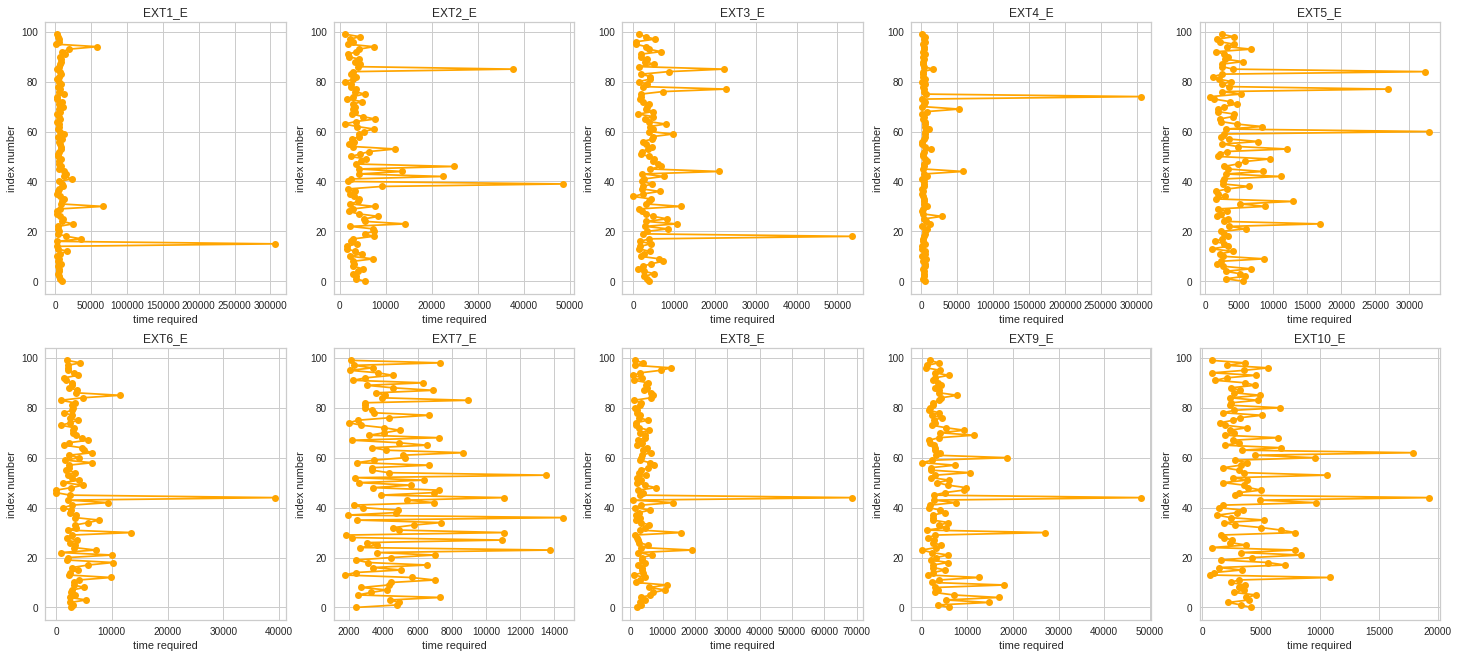

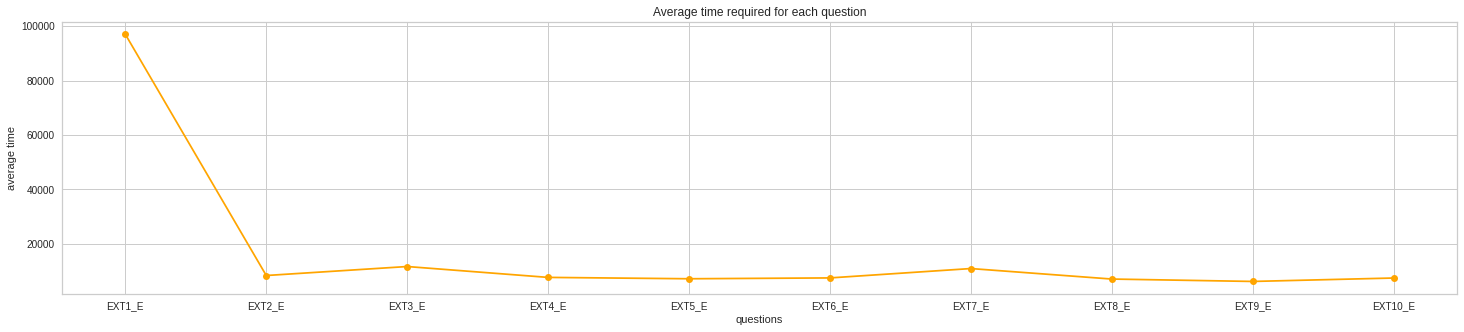

In [389]:
print('Time required for Extroversion Personality')
time_required_for_questions(EXT_E,'EXT', ext_e_questions, 'orange')

Time required for Neuroticism Personality


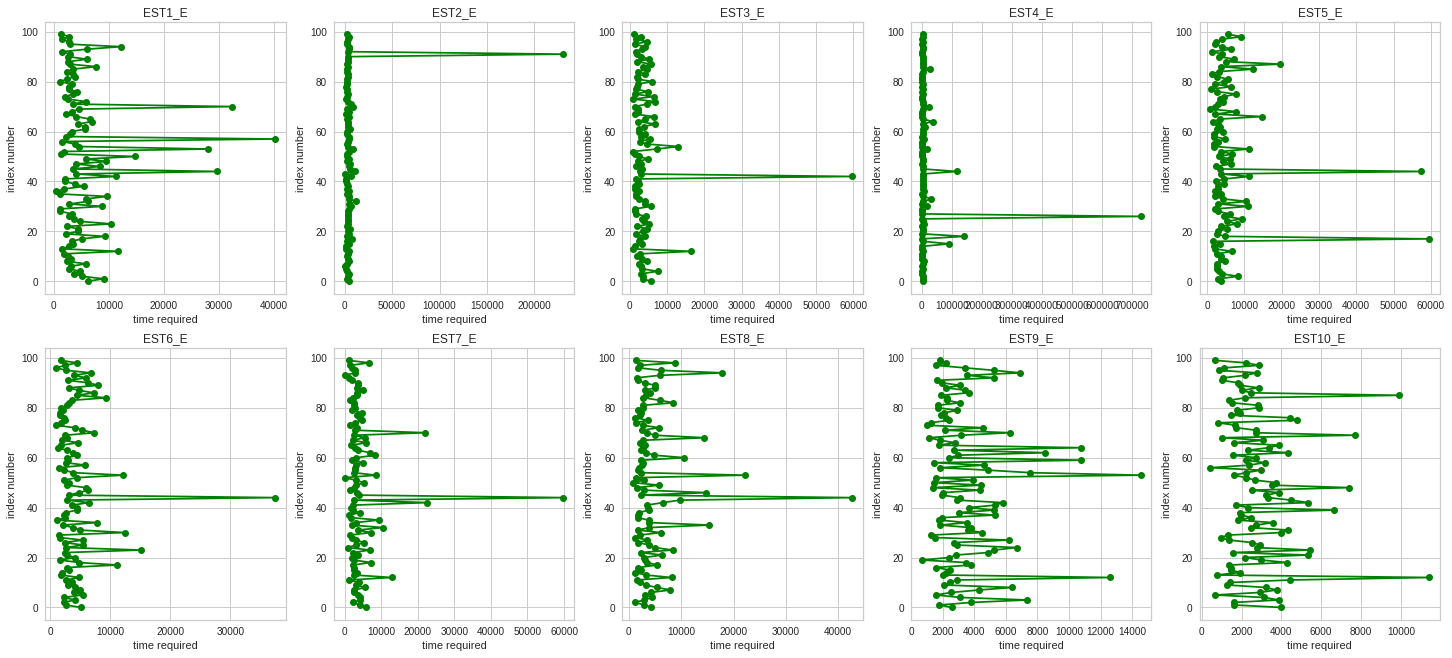

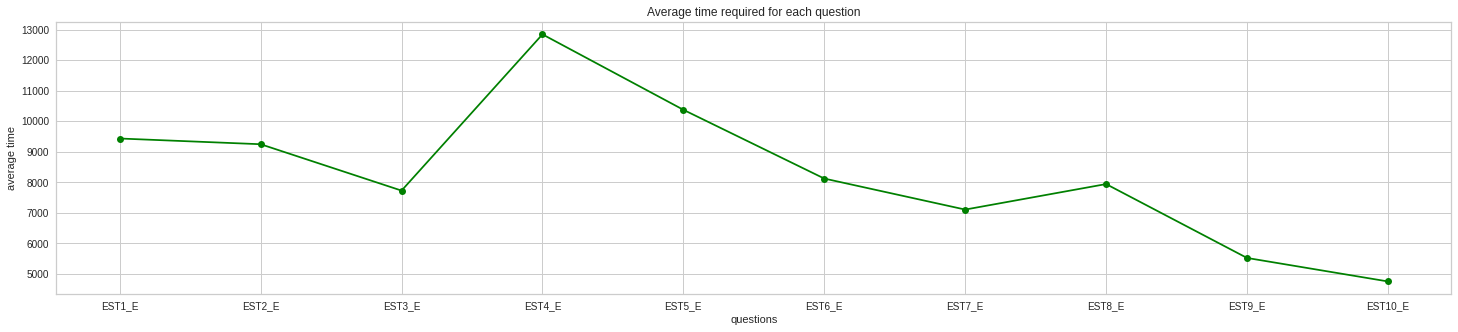

In [390]:
print('Time required for Neuroticism Personality')
time_required_for_questions(EST_E, 'EST', est_e_questions, 'green')

Time required for Agreeable Personality


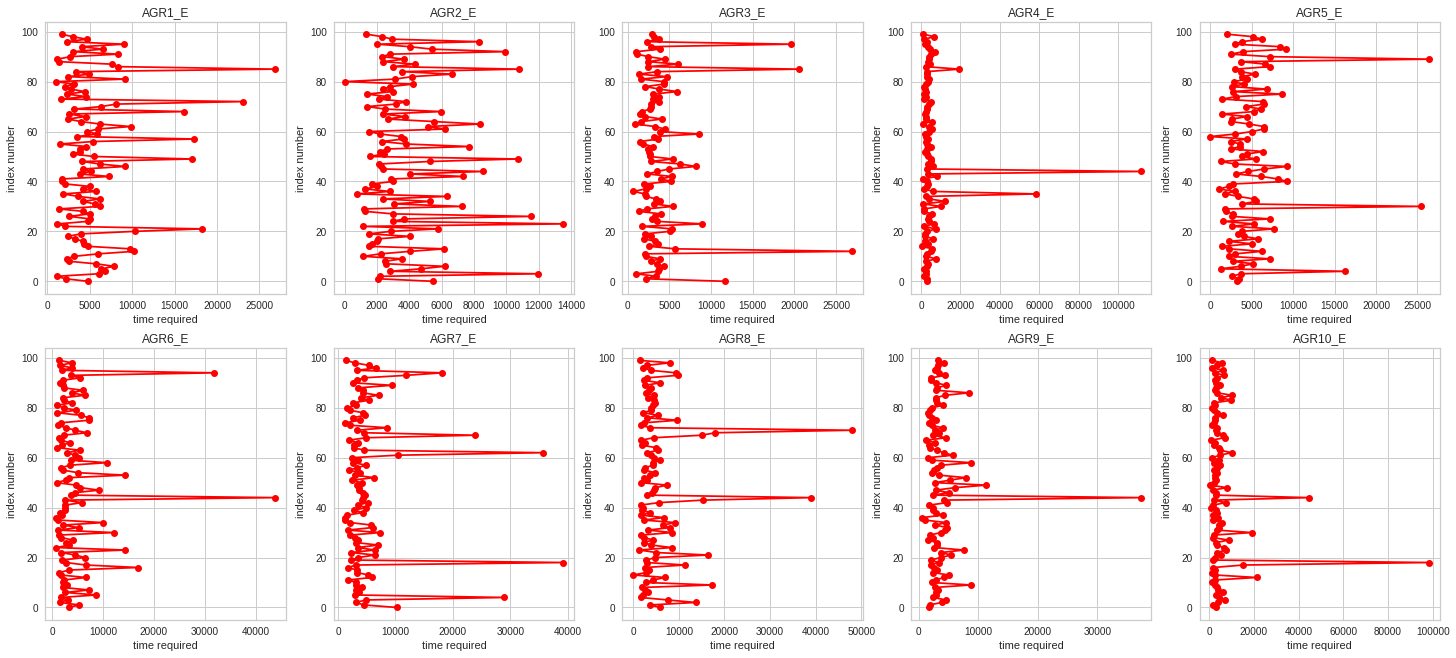

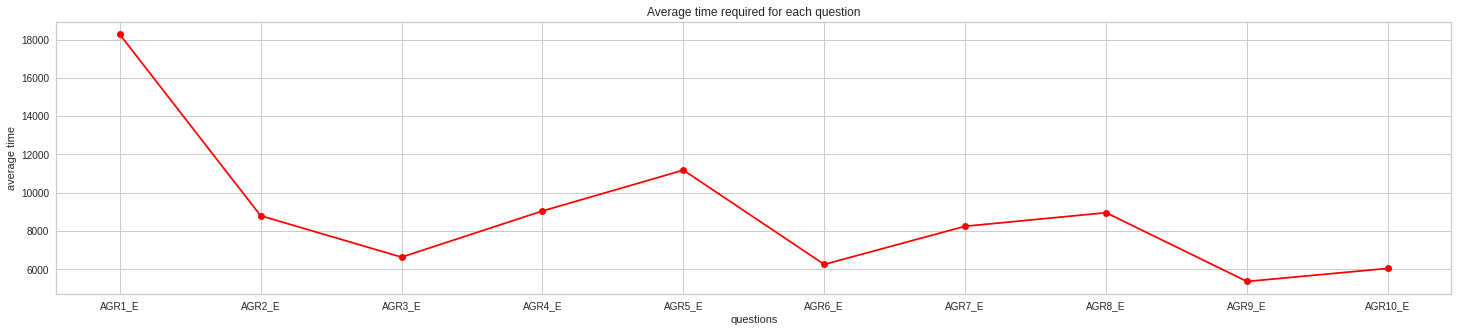

In [391]:
print('Time required for Agreeable Personality')
time_required_for_questions(AGR_E, 'AGR', agr_e_questions, 'red')

Time required for Conscientious Personality


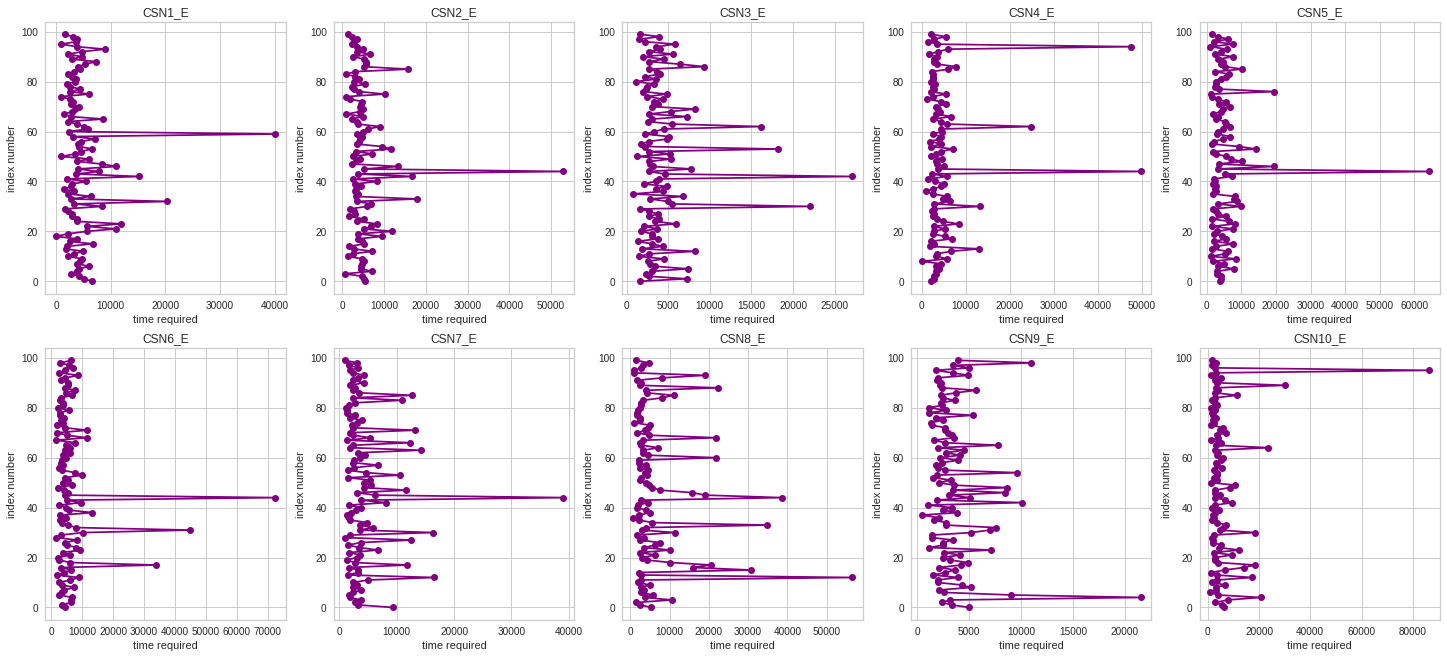

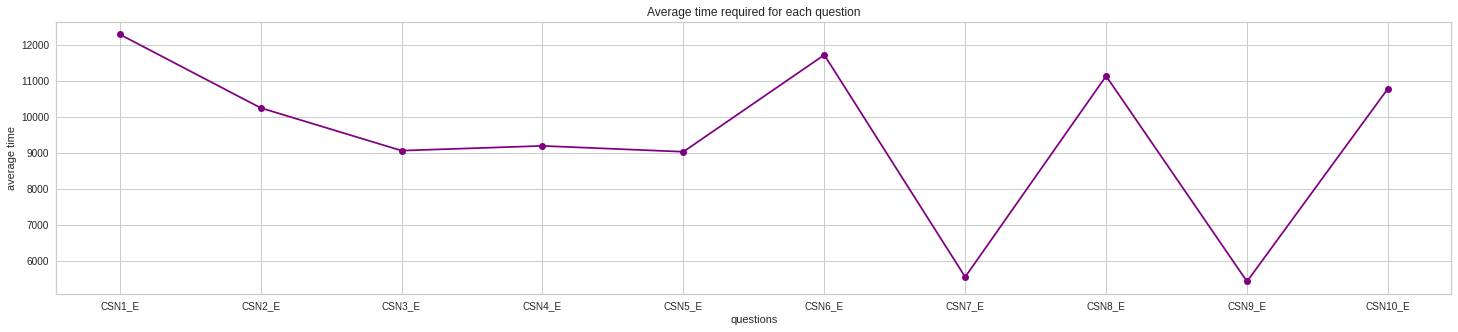

In [392]:
print('Time required for Conscientious Personality')
time_required_for_questions(CSN_E, 'CSN', csn_e_questions, 'purple')

Time required for Open Personality


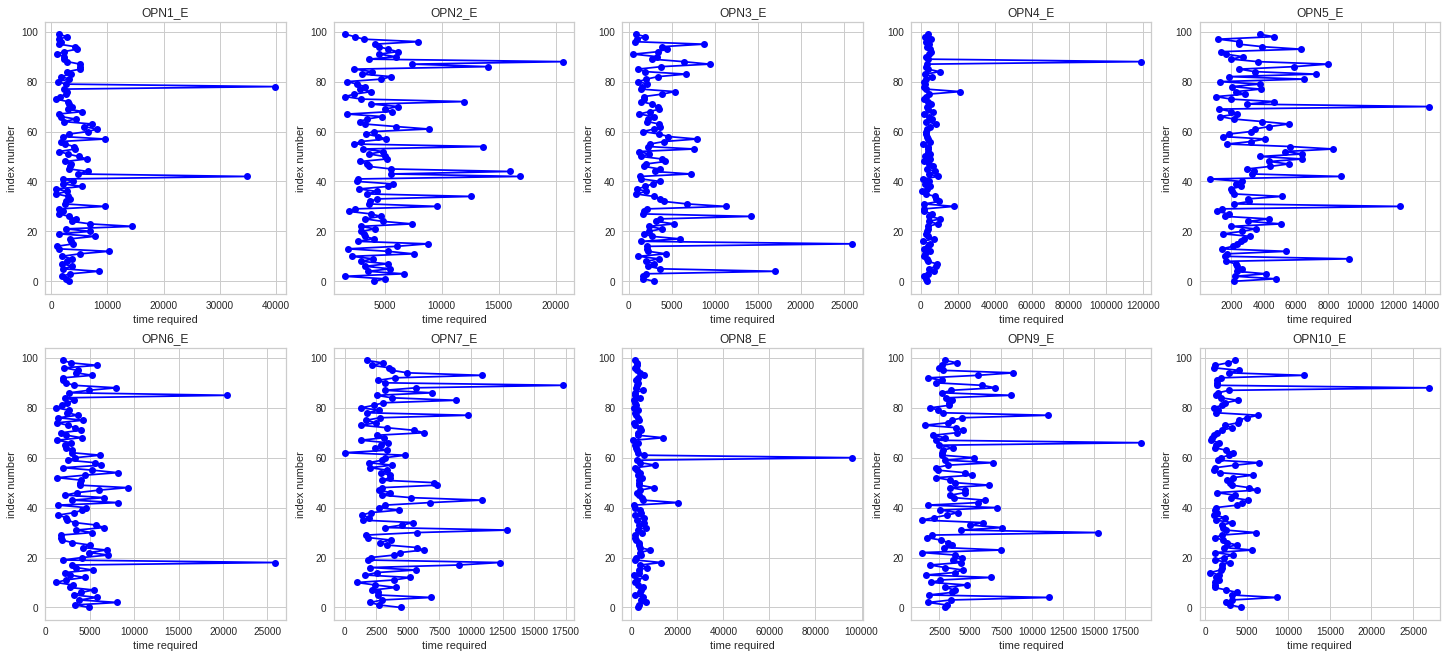

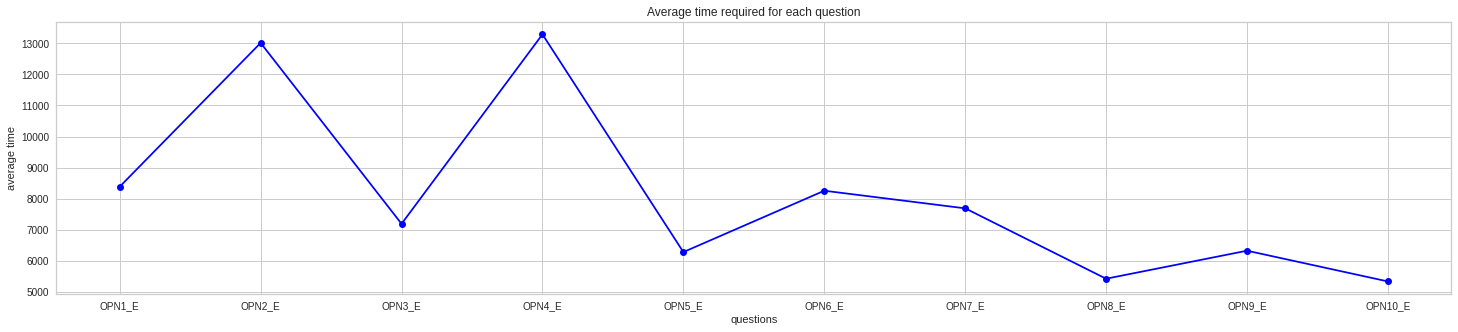

In [393]:
print('Time required for Open Personality')
time_required_for_questions(OPN_E, 'OPN', opn_e_questions, 'blue')

In [394]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000
from sklearn.preprocessing import MinMaxScaler

#
df = data.drop('country', axis=1)
# print("---------------------------------------------")
# # print(df)
# print(df.columns)
columns = list(df.columns)
#
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]


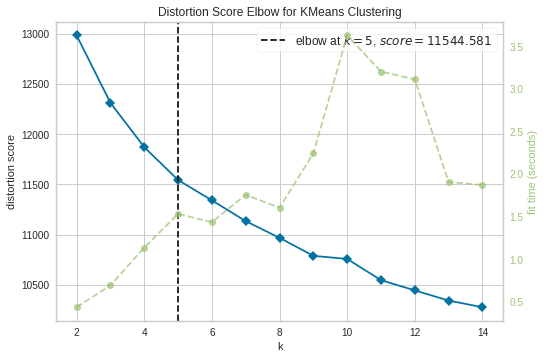

In [395]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.show()

In [396]:
def silhouette_visual_graph_plot(data_sample, clusters_count, color):
    model = KMeans(clusters_count, random_state=36)
    visualizer = SilhouetteVisualizer(model, colors=color)
    visualizer.fit(data_sample)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure


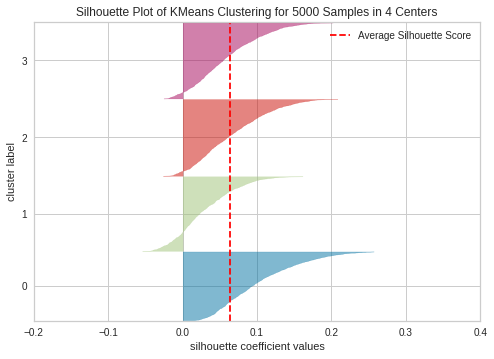

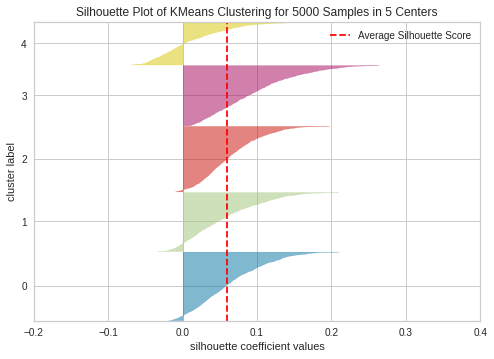

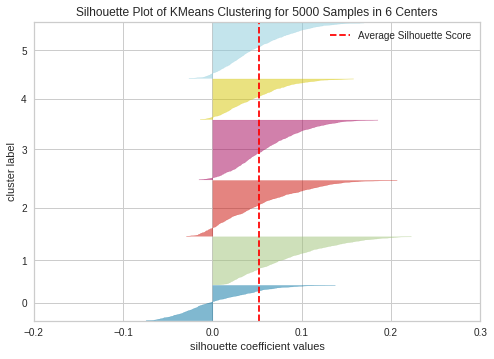

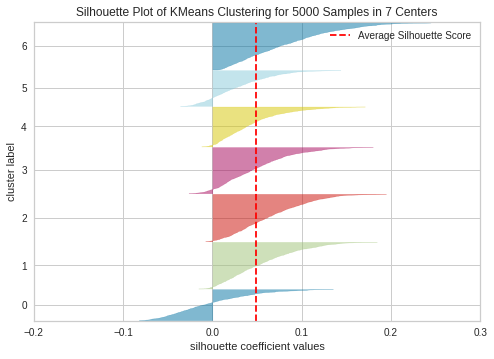

In [397]:
for i in range(4, 8):
    silhouette_visual_graph_plot(df_sample, i, 'yellowbrick')


In [467]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# using unscaled data but without the country column
# ================================================================================
df_model = data.drop('country', axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)  # , init='k-means++')
k_fit = kmeans.fit(df_model)
#
# Predicting the Clusters
pd.options.display.max_columns = 50
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model
print(kmeans.inertia_)

59991919.37726642


In [399]:
df_model.Clusters.value_counts()

pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1) / 10
data_sums['neurotic'] = df_model[est].sum(axis=1) / 10
data_sums['agreeable'] = df_model[agr].sum(axis=1) / 10
data_sums['conscientious'] = df_model[csn].sum(axis=1) / 10
data_sums['open'] = df_model[opn].sum(axis=1) / 10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.966136,3.646105,3.149228,3.173645,3.245840
1,3.072268,3.427257,3.300122,3.211503,3.352298
2,3.052598,2.978437,3.187420,3.158206,3.242794
3,2.908820,2.527862,2.850931,2.914632,3.120630
4,3.085231,2.423240,3.208914,3.106645,3.327588


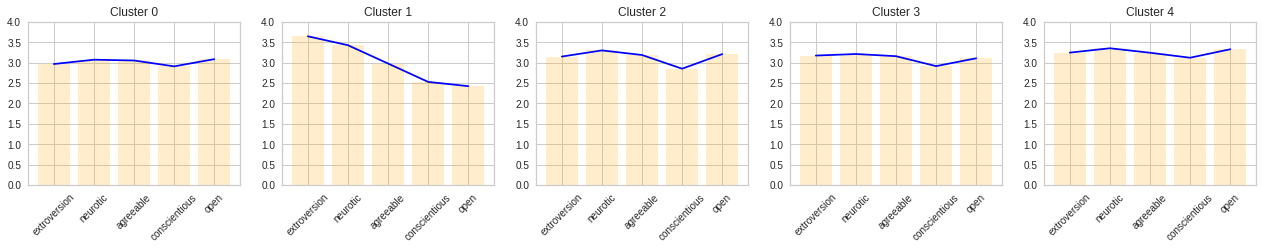

In [453]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22, 3))
for i in range(0, 5):
    plt.subplot(1, 5, i + 1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='orange', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='blue')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0, 4);

plt.show()

[[-5.36125463 -0.67720629]
 [ 0.03887699  2.06415506]
 [-0.81018433  1.50349829]
 ...
 [-1.5771865  -2.64510519]
 [ 2.03479258  0.23543306]
 [-2.75637496 -2.12343625]]
1013481
(1013481, 2)


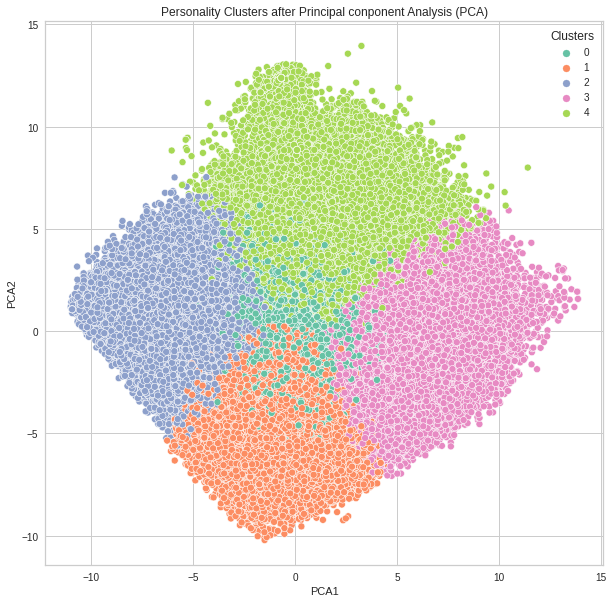

In [463]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)
print(pca_fit)
print(len(pca_fit))

print(pca_fit.shape)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=1)
plt.title('Personality Clusters after Principal conponent Analysis (PCA)');
plt.show()

In [454]:

my_data = pd.read_excel('/content/drive/MyDrive/Project/myData.xlsx')
my_data
print(my_data.shape)

dfn = scaler.fit_transform(my_data)
dfn = pd.DataFrame(my_data, columns=columns)

my_personality = k_fit.predict(dfn)
print('My Personality Cluster: ', my_personality)

(1, 50)
My Personality Cluster:  [4]


In [455]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,2.3,3.9,2.4,2.7,3.6,4


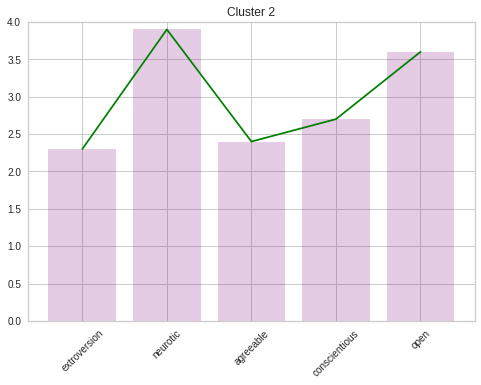

In [458]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='purple', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='green')
plt.title('Cluster 2')
plt.xticks(rotation=45)
plt.ylim(0,4);

([<matplotlib.patches.Wedge at 0x7f18eff7bad0>,
 [Text(-0.9731712561964738, -0.5127745178077567, 'extroversion'),
  Text(0.24154170515711346, -1.0731531133392822, 'neurotic'),
  Text(1.099755503996816, -0.023191192912593778, 'agreeable'),
  Text(0.5432911502938365, 0.9564699294867561, 'conscientious'),
  Text(-0.7980449143955574, 0.7570497438130388, 'open')])

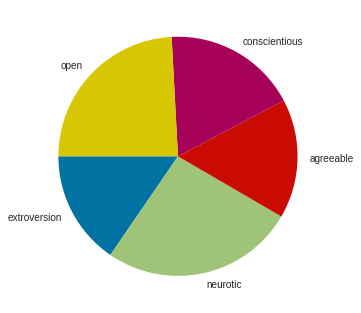

In [466]:
plt.pie(my_sum.iloc[0,:], labels= my_sum.columns, startangle=180)